In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe() # min values appears to be zero - which is a problem

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

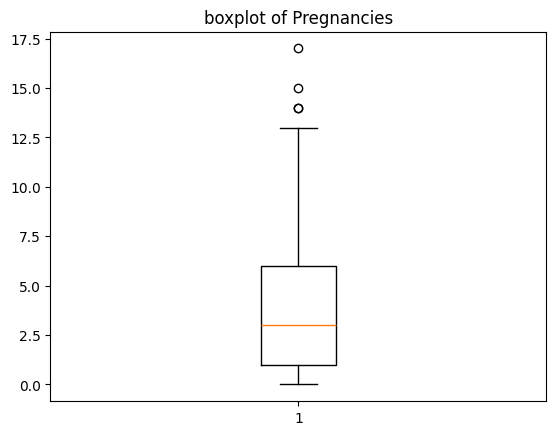

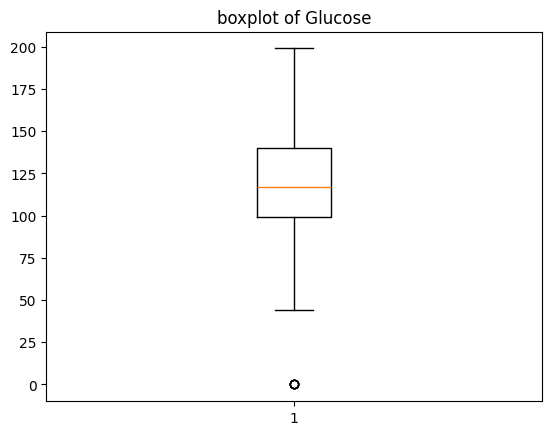

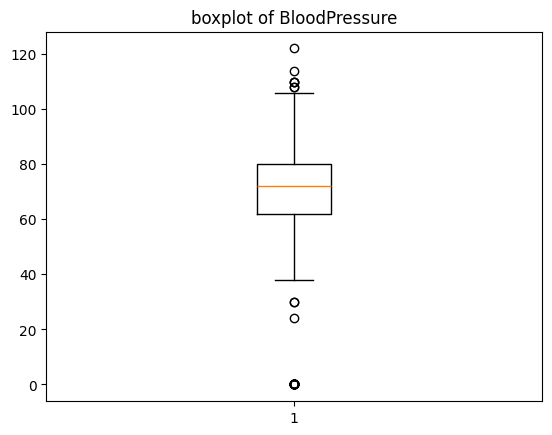

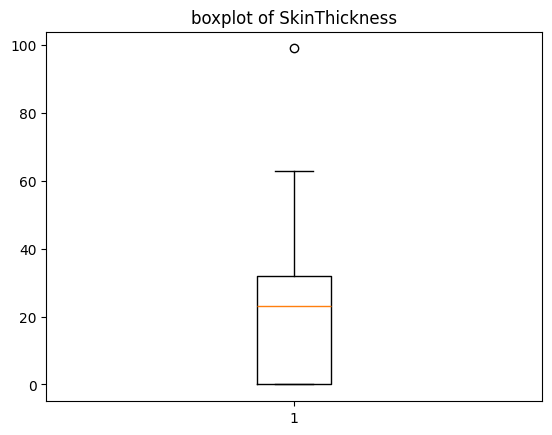

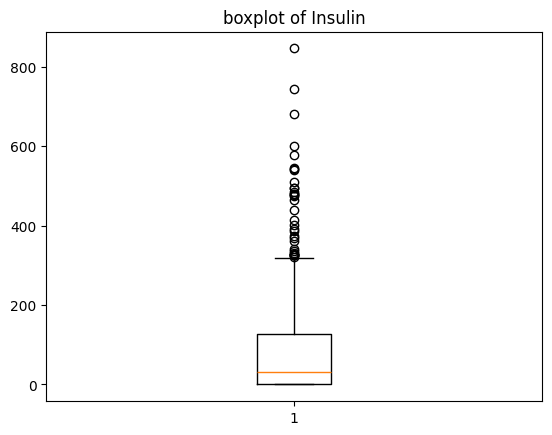

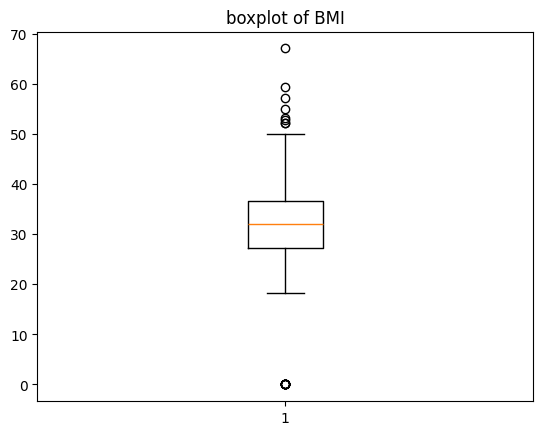

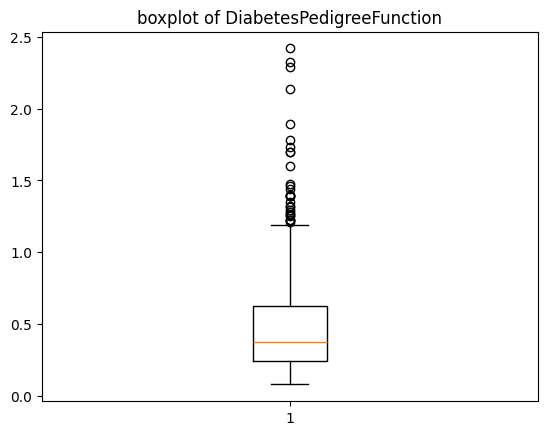

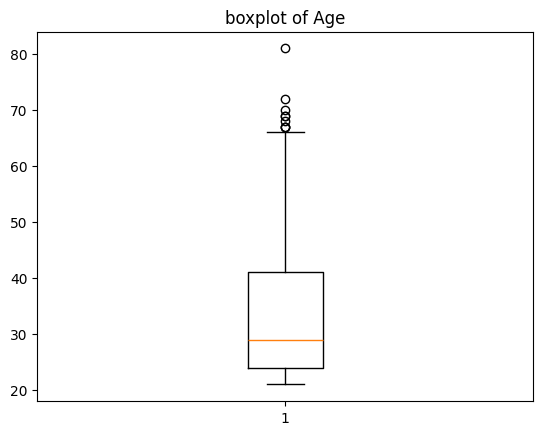

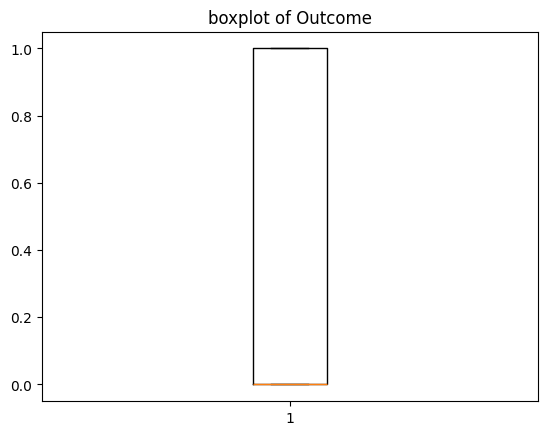

In [8]:
for i in df:
    if df[i].dtype in ['float','int64']:
        plt.boxplot(df[i])
        plt.title(f"boxplot of {i}")
        plt.show()

In [9]:
# Since there are so many outliers, lets fill all the zero value outlier in glucose,bp,skin,insulin and BMI to NaN inorder to use fillnan function and fill them with median columns

In [10]:
cols_with_zero_invalids = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero_invalids] = df[cols_with_zero_invalids].replace(0, np.nan)                    #filling 0 values with NaN


In [11]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
df.fillna(df.median(numeric_only=True), inplace=True)       #filling NaN with median

In [13]:
df.median(numeric_only=True)

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [14]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [15]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
X = df.drop('Outcome', axis=1)                 #separating features and labels as x and y
y = df['Outcome']

In [17]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
x_scaled=minmax.fit_transform(X)                    #FITTING 

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)        #TRAIN AND TEST SPLITTING

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)                                      #using KNN to train the model

KNeighborsClassifier()

In [20]:
y_pred=model.predict(x_test)                                     #testing the model to predict the diabetes of 30%

In [21]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,2),'%')            #accuracy of model

71.86 %


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       151
           1       0.60      0.57      0.59        80

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.72      0.72      0.72       231



Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
print (cross_val_score(KNeighborsClassifier(),x_scaled,y, cv=5).mean())

0.753993718699601


Hyperparameter Tuning

In [24]:
# GridSearchCV KNN
parameters={'n_neighbors':range(1,28,2), 'weights':['uniform','distance']}
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
grid.fit(x_scaled, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 28, 2),
                         'weights': ['uniform', 'distance']})

In [25]:
grid.best_params_

{'n_neighbors': 21, 'weights': 'uniform'}

In [26]:
grid.best_score_

np.float64(0.7761225702402174)

In [28]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001104,0.000208,0.003507,0.000639,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.707792,0.642857,0.662338,0.732026,0.653595,0.679722,0.034256,27
1,0.000800,0.000400,0.001104,0.000204,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.707792,0.642857,0.662338,0.732026,0.653595,0.679722,0.034256,27
2,0.000599,0.000489,0.003408,0.000377,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.766234,0.727273,0.701299,0.790850,0.718954,0.740922,0.032779,25
3,0.001135,0.000223,0.001089,0.000171,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.766234,0.714286,0.694805,0.790850,0.712418,0.735719,0.036460,26
4,0.000602,0.000492,0.003628,0.000611,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.727273,0.779221,0.688312,0.810458,0.764706,0.753994,0.042350,22
5,0.000800,0.000400,0.001207,0.000249,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.727273,0.772727,0.688312,0.810458,0.764706,0.752695,0.041650,23
6,0.000600,0.000490,0.003810,0.000514,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.759740,0.759740,0.694805,0.784314,0.764706,0.752661,0.030313,24
7,0.000803,0.000401,0.001199,0.000399,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.759740,0.766234,0.694805,0.790850,0.764706,0.755267,0.032097,21
8,0.000799,0.000399,0.003412,0.000370,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.766234,0.746753,0.753247,0.797386,0.751634,0.763051,0.018336,15
9,0.000598,0.000489,0.001298,0.000594,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.753247,0.753247,0.746753,0.803922,0.745098,0.760453,0.021986,16


In [30]:
final_model=grid.best_estimator_

ROC Curve

In [31]:
from sklearn.metrics import roc_curve, auc

In [32]:
y_pred=model.predict(x_test)

In [ ]:
roc_curve(y_test,y_pred) # returns 3 values - fpr, tpr and threshold.

(array([0.        , 0.20529801, 1.        ]),
 array([0.   , 0.575, 1.   ]),
 array([inf,  1.,  0.]))

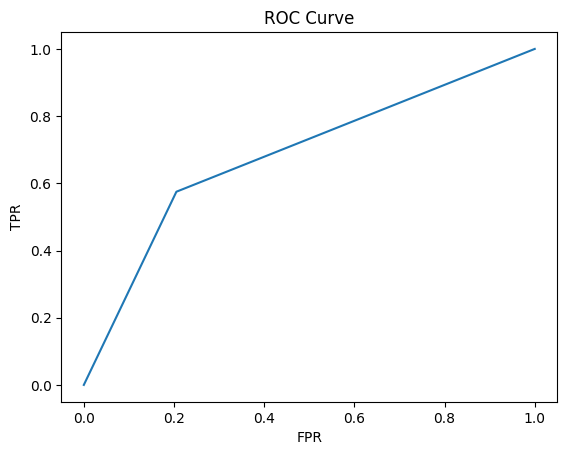

In [37]:
fpr, tpr, threshold=roc_curve(y_test,y_pred)
auc(fpr,tpr)
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()